## Overall indices calculation for train and test datasets

In [19]:
# Import packages 
import os 
import numpy as np
import pandas as pd
import xarray as xr
os.chdir('/Users/kaushalk/Desktop/open_projects/Telengana_Crop_Health/')

from src.process_data import compute_indices_for_df, prepare_model_data
from src.visualize import plot_numerical_distributions, plot_confusion_matrix

In [4]:
train_df = pd.read_csv('data/raw/Train.csv')
test_df = pd.read_csv('data/raw/Test.csv')

In [6]:
train_df.head()

FarmID  category   Crop      State District Sub-District  \
0  1326576   Healthy  Paddy  Telangana    Medak    Kulcharam   
1  1326577   Healthy  Paddy  Telangana    Medak    Kulcharam   
2  1326578   Healthy  Paddy  Telangana    Medak    Kulcharam   
3  1331836  Diseased  Paddy  Telangana    Medak    Kulcharam   
4  1326579  Diseased  Paddy  Telangana    Medak    Kulcharam   

                SDate               HDate  CropCoveredArea  CHeight CNext  \
0  2023-11-25 0:00:00  2024-04-14 0:00:00               97       54   Pea   
1  2023-11-13 0:00:00  2024-04-26 0:00:00               82       58   Pea   
2  2023-12-19 0:00:00  2024-04-28 0:00:00               92       91   Pea   
3  2023-02-11 0:00:00  2024-11-04 0:00:00               91       52   Pea   
4  2023-12-12 0:00:00  2024-05-19 0:00:00               94       55   Pea   

    CLast        CTransp IrriType   IrriSource  IrriCount  WaterCov  ExpYield  \
0  Lentil  Transplanting    Flood  Groundwater          4        87        17   
1  Lentil  Transplanting    Flood        Canal          5        94        15   
2  Lentil  Transplanting    Flood        Canal          3        99        20   
3  Lentil  Transplanting    Flood        Canal          5        92        16   
4  Lentil  Transplanting    Flood        Canal          5        97        20   

  Season                                           geometry  
0   Rabi  POLYGON ((78.18143246076087 17.978884603571068...  
1   Rabi  POLYGON ((78.17545177547453 17.981074445477304...  
2   Rabi  POLYGON ((78.16914224770792 17.976212849967755...  
3   Rabi  POLYGON ((78.16889103841902 17.974608186550842...  
4   Rabi  POLYGON ((78.17264452998072 17.969251496349454...

In [62]:
train_df['SDate'] = pd.to_datetime(train_df.SDate)
train_df['HDate'] = pd.to_datetime(train_df.HDate)
test_df['SDate'] = pd.to_datetime(test_df.SDate)
test_df['HDate'] = pd.to_datetime(test_df.HDate)

In [80]:
train_df['TDays'] = (train_df.HDate-train_df.SDate).dt.days
test_df['TDays'] = (test_df.HDate-test_df.SDate).dt.days

In [82]:
train_df['TMonth'] = train_df['TDays']//30
test_df['TMonth'] = test_df['TDays']//30

In [8]:
tpath_file = 'data/raw/gee_downloads_train/train_s2_datapath.csv'
train_df = pd.read_csv(tpath_file, index_col=0)

In [10]:
train_df.head()

category   Crop      State District Sub-District               SDate  \
FarmID                                                                          
1326576   Healthy  Paddy  Telangana    Medak    Kulcharam  2023-11-25 0:00:00   
1326577   Healthy  Paddy  Telangana    Medak    Kulcharam  2023-11-13 0:00:00   
1326578   Healthy  Paddy  Telangana    Medak    Kulcharam  2023-12-19 0:00:00   
1331836  Diseased  Paddy  Telangana    Medak    Kulcharam  2023-02-11 0:00:00   
1326579  Diseased  Paddy  Telangana    Medak    Kulcharam  2023-12-12 0:00:00   

                      HDate  CropCoveredArea  CHeight CNext   CLast  \
FarmID                                                                
1326576  2024-04-14 0:00:00               97       54   Pea  Lentil   
1326577  2024-04-26 0:00:00               82       58   Pea  Lentil   
1326578  2024-04-28 0:00:00               92       91   Pea  Lentil   
1331836  2024-11-04 0:00:00               91       52   Pea  Lentil   
1326579  2024-05-19 0:00:00               94       55   Pea  Lentil   

               CTransp IrriType   IrriSource  IrriCount  WaterCov  ExpYield  \
FarmID                                                                        
1326576  Transplanting    Flood  Groundwater          4        87        17   
1326577  Transplanting    Flood        Canal          5        94        15   
1326578  Transplanting    Flood        Canal          3        99        20   
1331836  Transplanting    Flood        Canal          5        92        16   
1326579  Transplanting    Flood        Canal          5        97        20   

        Season                                           geometry  \
FarmID                                                              
1326576   Rabi  POLYGON ((78.18127248427754 17.978906389284404...   
1326577   Rabi  POLYGON ((78.1752973813341 17.981183044327867,...   
1326578   Rabi  POLYGON ((78.1690778768782 17.976341515390775,...   
1331836   Rabi  POLYGON ((78.16872276852166 17.974628668280985...   
1326579   Rabi  POLYGON ((78.17259454733667 17.969343859503397...   

                                                  tif_path  
FarmID                                                      
1326576  data/raw/gee_downloads_train//20240412T050649_...  
1326577  data/raw/gee_downloads_train//20240425T051649_...  
1326578  data/raw/gee_downloads_train//20240427T050651_...  
1331836  data/raw/gee_downloads_train//20241103T050951_...  
1326579  data/raw/gee_downloads_train//20240517T050651_...

In [ ]:
train_ind_df = compute_indices_for_df(train_df).reset_index()

In [16]:
train_ind_df.describe().round(2)

FarmID  CropCoveredArea  CHeight  IrriCount  WaterCov  ExpYield  \
count     7888.00          7888.00  7888.00    7888.00   7888.00   7888.00   
mean   1256653.98            77.42    87.45       3.54     57.15     15.69   
std     238080.47            14.48    50.31       1.41     22.86      5.65   
min        278.00            40.00    20.00       1.00     20.00      5.00   
25%    1316512.25            66.00    54.00       2.00     41.00     11.00   
50%    1326680.50            79.00    76.00       4.00     51.00     15.00   
75%    1329223.75            89.00   100.00       5.00     82.00     20.00   
max    1332156.00           100.00   250.00       6.00    100.00     30.00   

          NDVI      EVI     NDWI    GNDVI     SAVI    MSAVI  MoistureIndex  \
count  7871.00  7871.00  7871.00  7871.00  7871.00  7871.00        7872.00   
mean      0.15     0.25    -0.17     0.17     0.12     0.12           0.08   
std       0.09     0.15     0.08     0.08     0.07     0.07           0.13   
min      -0.10    -0.31    -0.49    -0.03    -0.07    -0.06          -0.16   
25%       0.08     0.15    -0.22     0.10     0.07     0.06          -0.02   
50%       0.15     0.25    -0.17     0.17     0.13     0.12           0.06   
75%       0.21     0.33    -0.10     0.22     0.17     0.16           0.16   
max       0.49     1.00     0.03     0.49     0.46     0.45           0.64   

          NDRE      LCI     LSWI  
count  7871.00  7871.00  7872.00  
mean      0.02     0.02     0.05  
std       0.01     0.01     0.13  
min      -0.07    -0.07    -0.21  
25%       0.01     0.01    -0.05  
50%       0.02     0.02     0.03  
75%       0.03     0.03     0.14  
max       0.19     0.19     0.64

In [29]:
train_ind_df.iloc[:, 20:]

tif_path      NDVI       EVI  \
0     data/raw/gee_downloads_train//20240412T050649_...  0.103244  0.169276   
1     data/raw/gee_downloads_train//20240425T051649_...  0.196182  0.359014   
2     data/raw/gee_downloads_train//20240427T050651_...  0.206604  0.375025   
3     data/raw/gee_downloads_train//20241103T050951_...  0.205601  0.314560   
4     data/raw/gee_downloads_train//20240517T050651_...  0.204152  0.689947   
...                                                 ...       ...       ...   
7883  data/raw/gee_downloads_train//20230925T050659_...  0.009293  0.093643   
7884  data/raw/gee_downloads_train//20230910T050701_...  0.027290  0.186506   
7885  data/raw/gee_downloads_train//20231229T051221_...  0.086445  0.127262   
7886  data/raw/gee_downloads_train//20230915T050659_...  0.018244  0.151351   
7887  data/raw/gee_downloads_train//20230423T050651_...  0.214278  0.323946   

          NDWI     GNDVI      SAVI     MSAVI  MoistureIndex      NDRE  \
0    -0.137874  0.137874  0.093438  0.089909       0.095105  0.004241   
1    -0.191513  0.191513  0.157596  0.146604      -0.032861  0.005505   
2    -0.207168  0.207168  0.173276  0.163626      -0.032272  0.013724   
3    -0.219299  0.219299  0.171823  0.162070       0.019914  0.012624   
4    -0.185398  0.185398  0.185018  0.179114      -0.078713  0.026941   
...        ...       ...       ...       ...            ...       ...   
7883 -0.027568  0.027568  0.011272  0.012582       0.609584  0.012992   
7884 -0.046182  0.046182  0.031875  0.034620       0.211780  0.032792   
7885 -0.121773  0.121773  0.074684  0.070426       0.156906  0.022427   
7886 -0.038077  0.038077  0.021991  0.024404       0.312128  0.032425   
7887 -0.226630  0.226630  0.180378  0.170666       0.027006  0.018656   

           LCI      LSWI  
0     0.004660  0.069917  
1     0.006505 -0.082250  
2     0.016116 -0.081100  
3     0.014956 -0.026706  
4     0.031565 -0.126627  
...        ...       ...  
7883  0.012943  0.611212  
7884  0.032619  0.200662  
7885  0.023808  0.138789  
7886  0.031979  0.306775  
7887  0.022187 -0.022694  

[7888 rows x 11 columns]

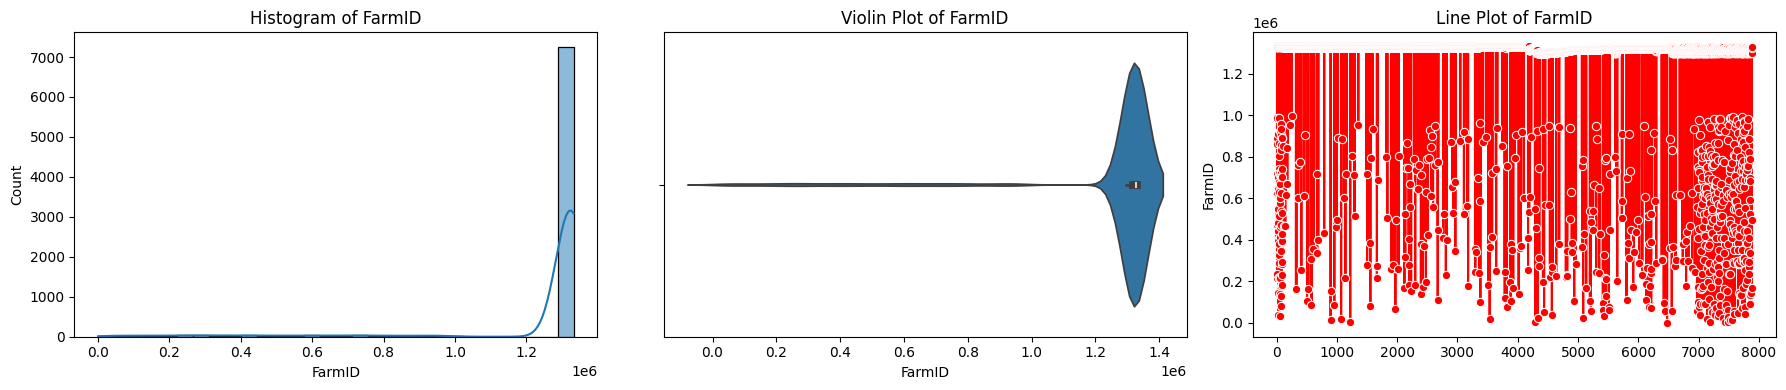

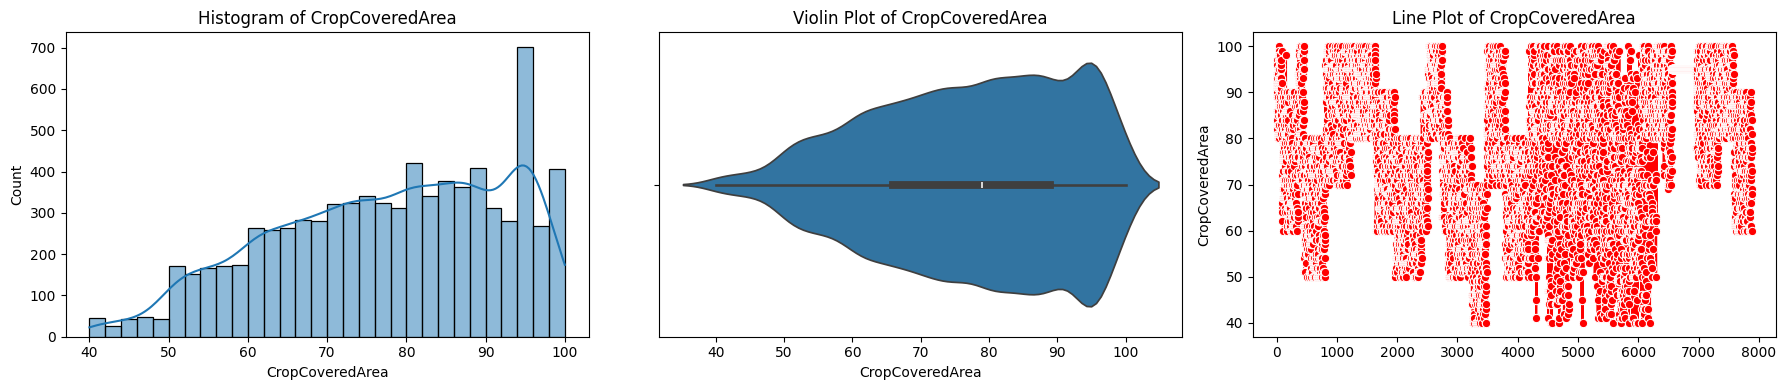

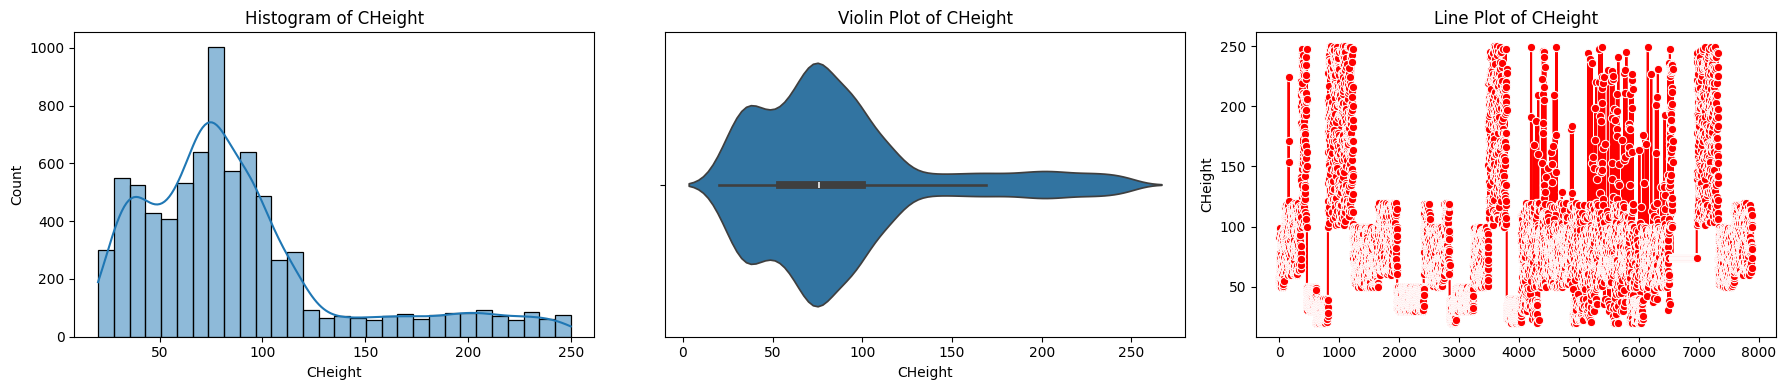

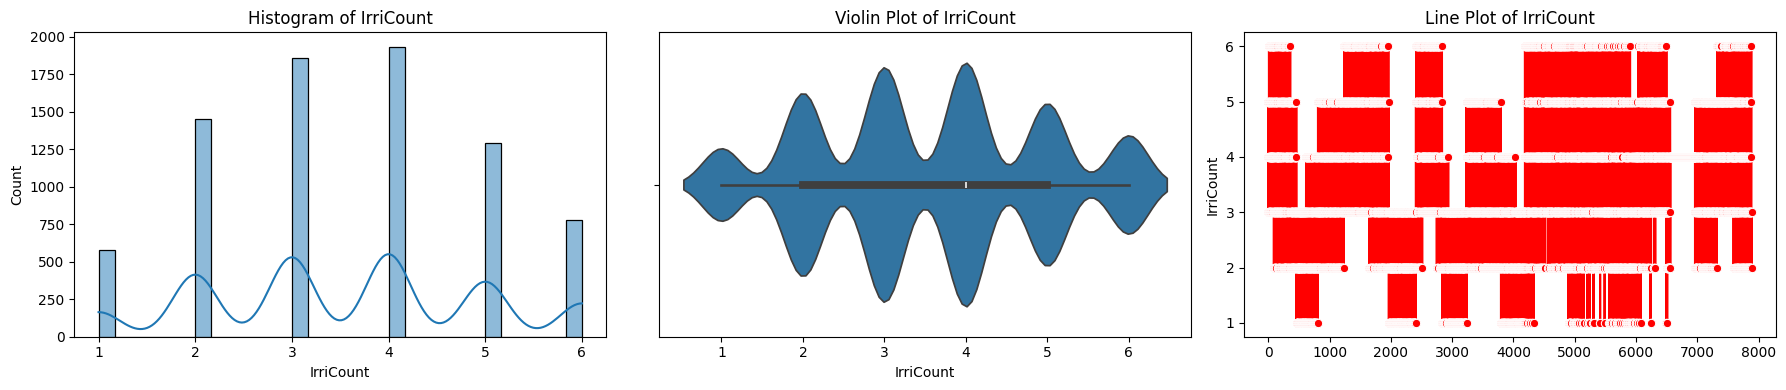

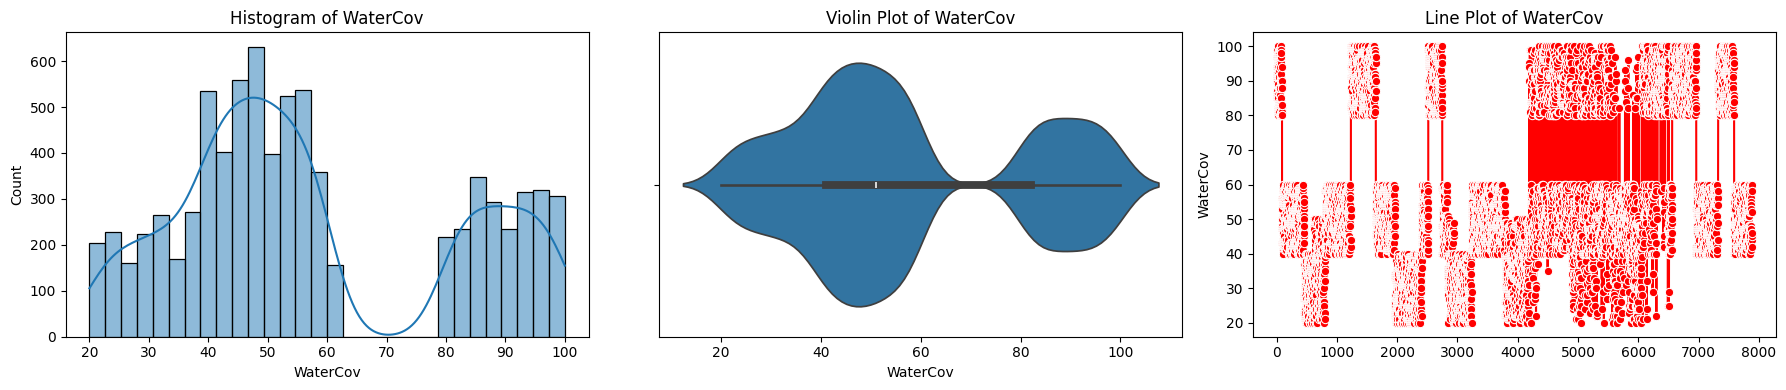

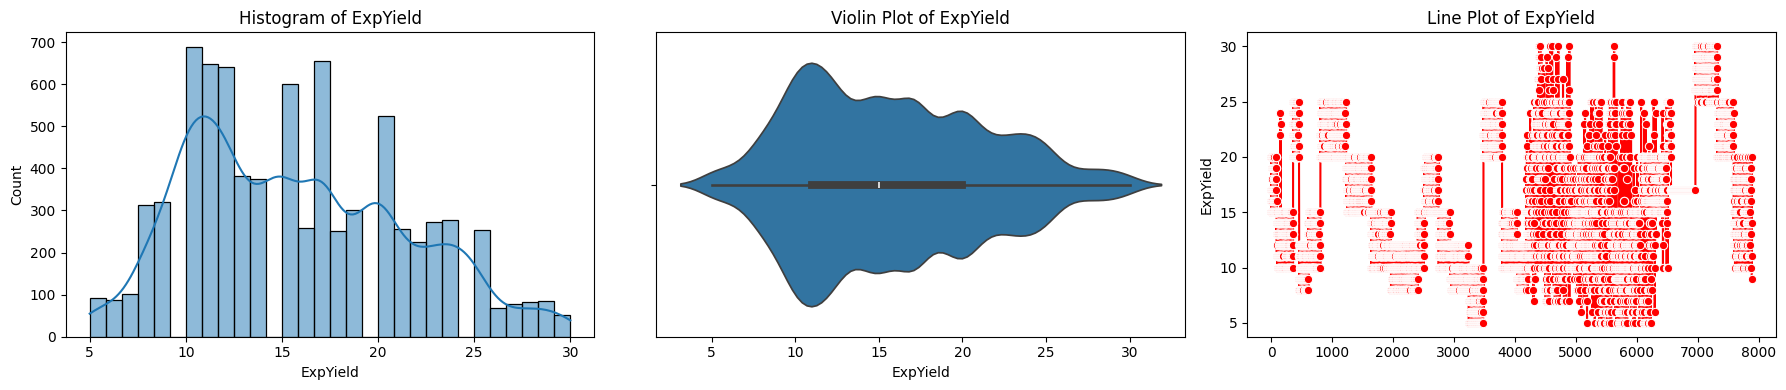

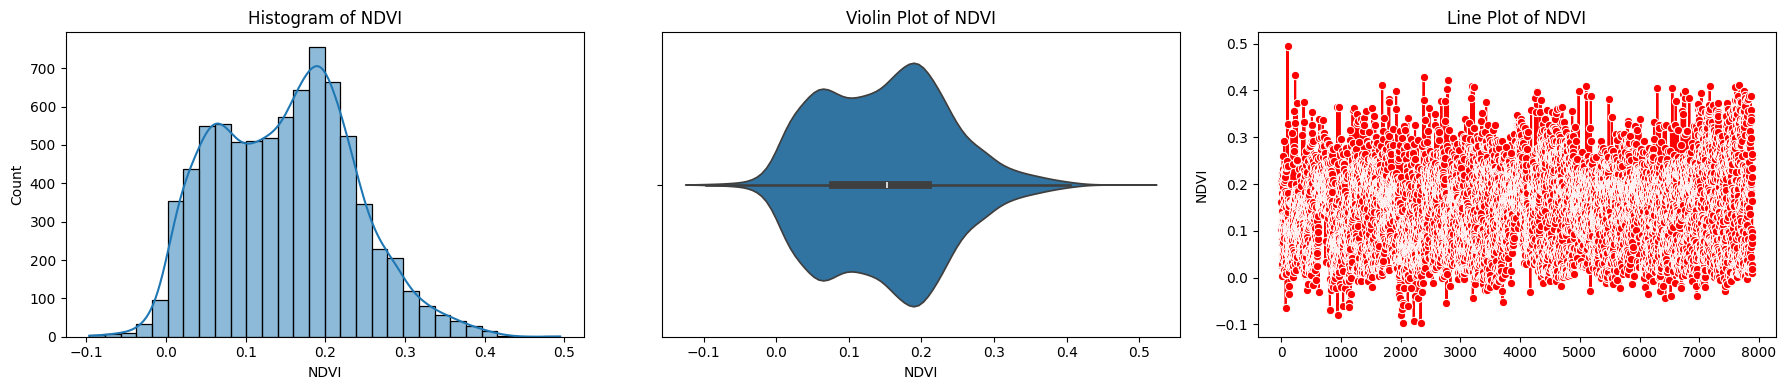

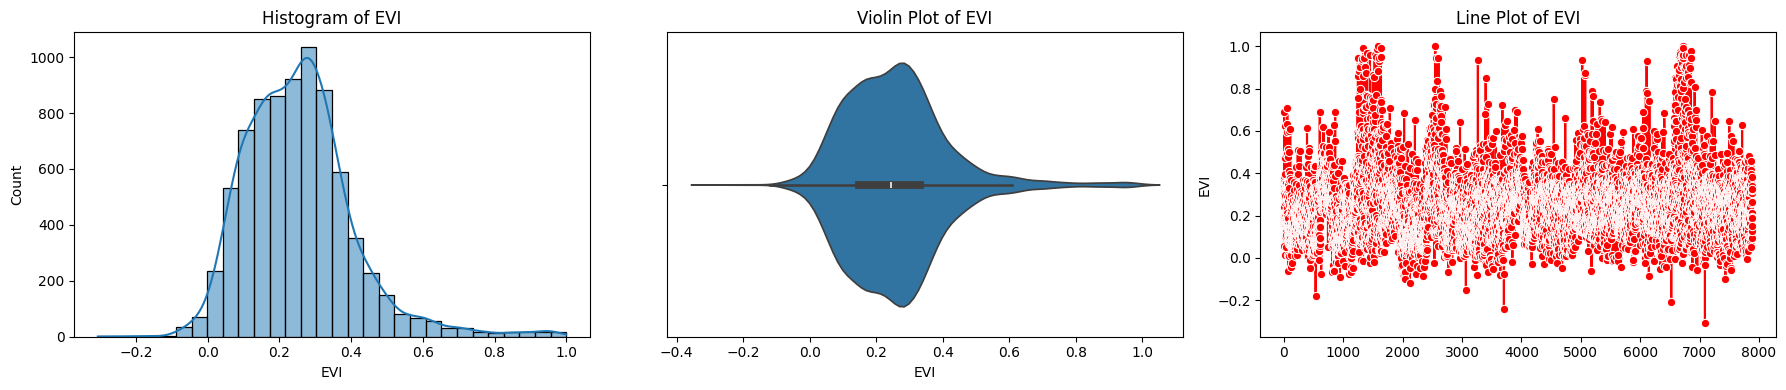

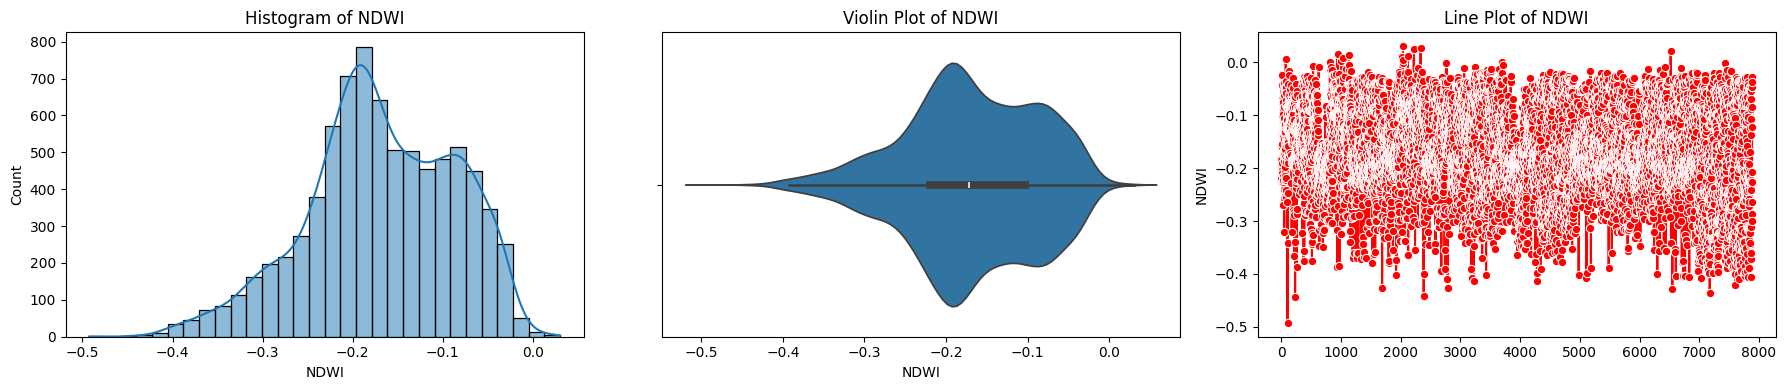

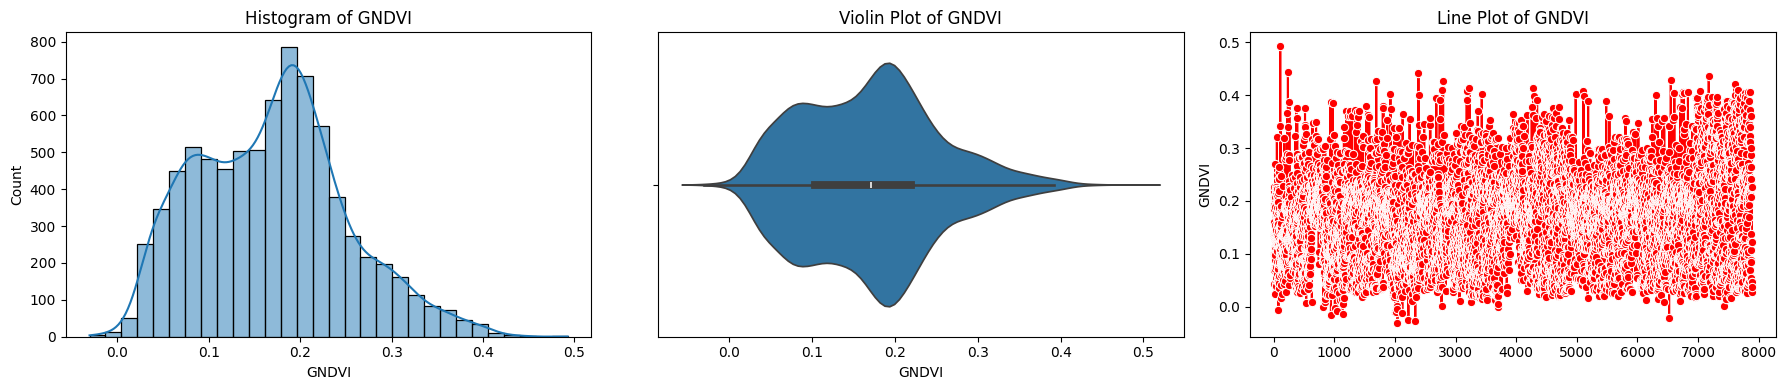

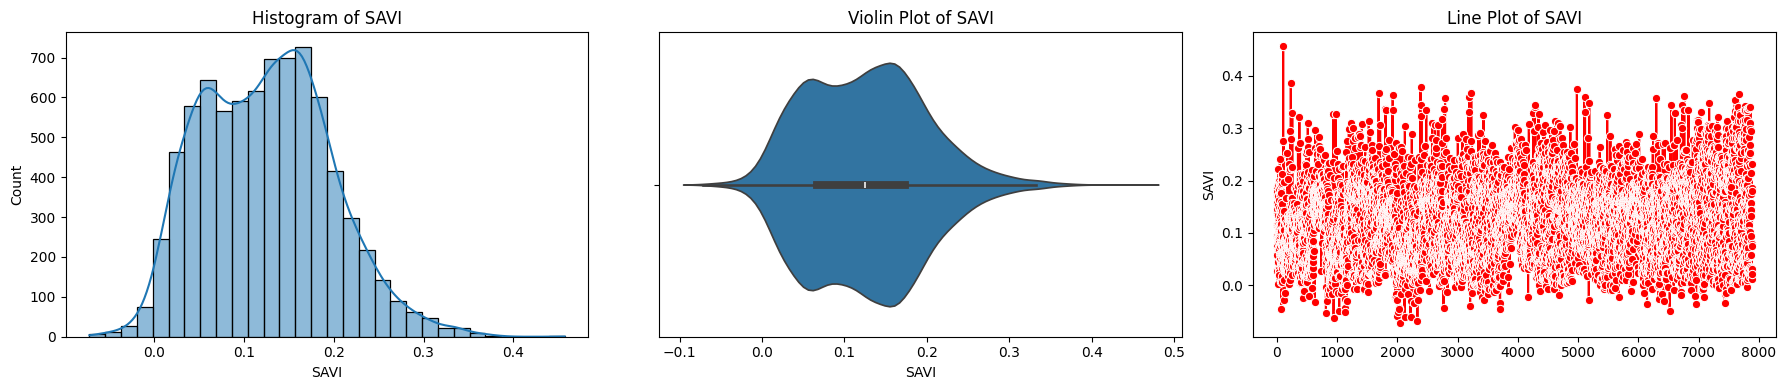

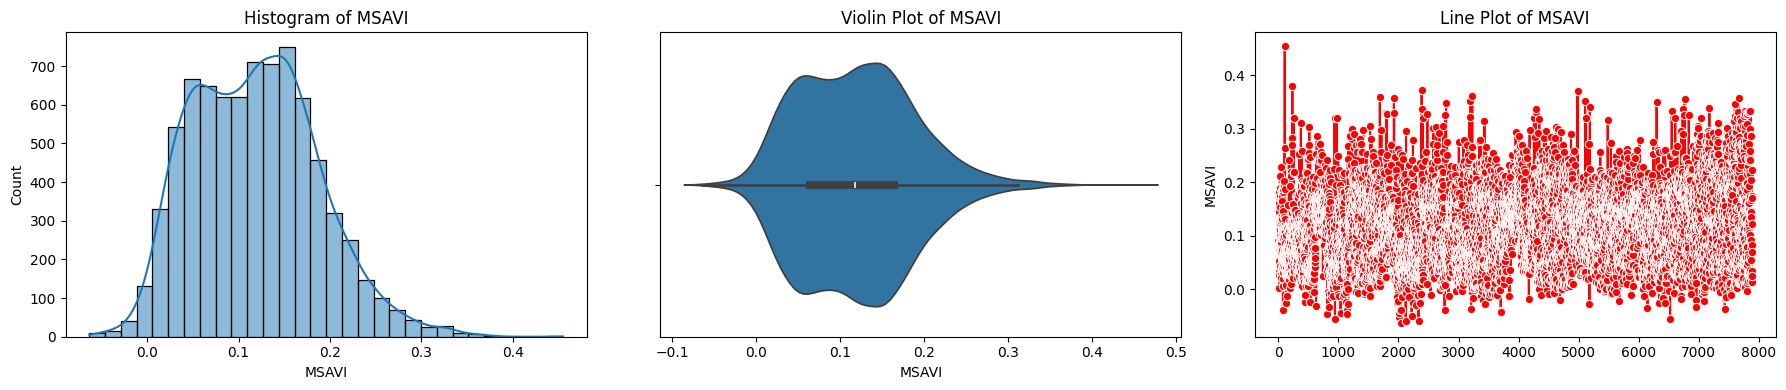

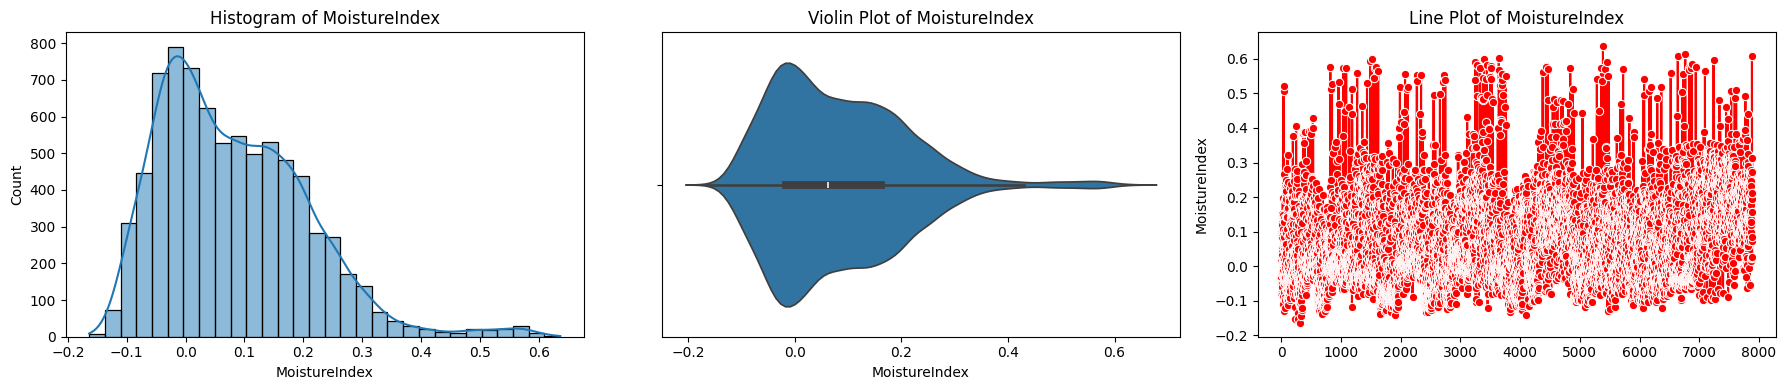

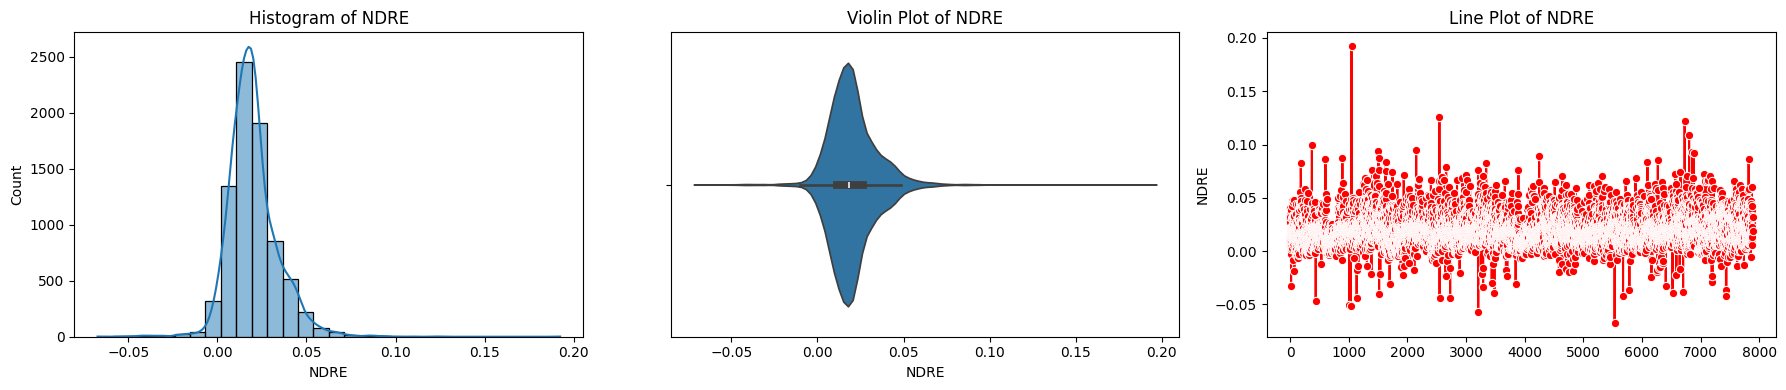

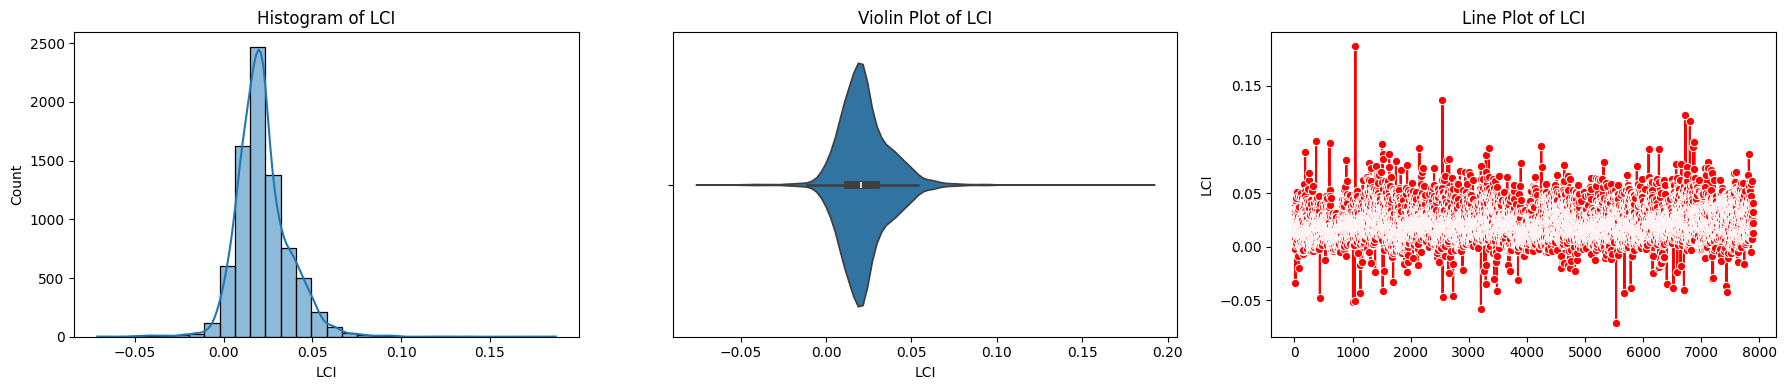

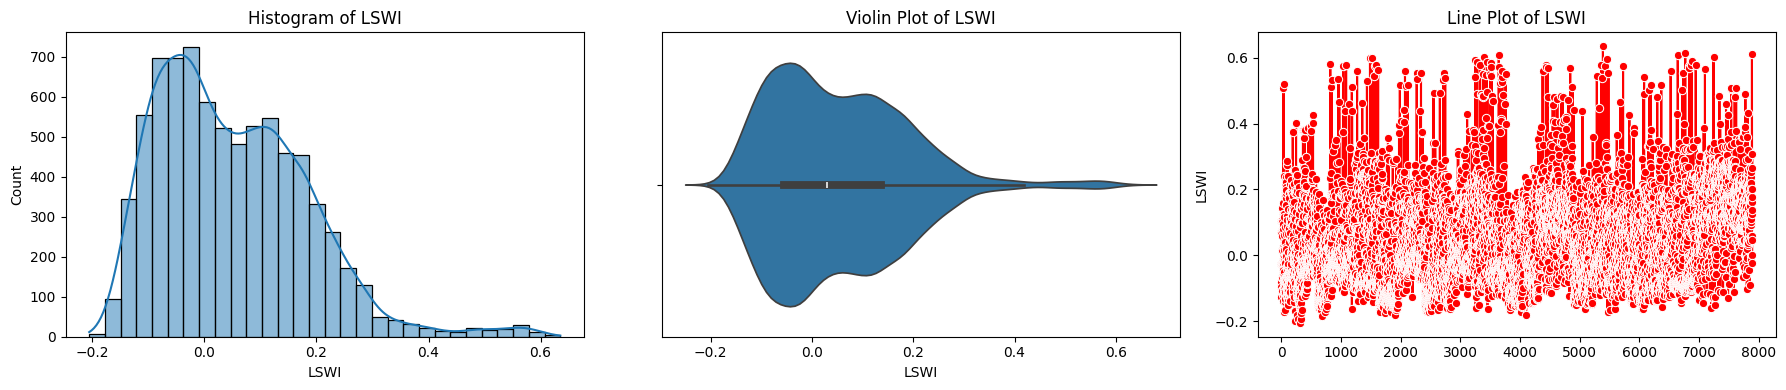

In [21]:
plot_numerical_distributions(train_ind_df[[]])

In [38]:
testpath_file = 'data/raw/gee_downloads_test/test_s2_datapath.csv'
test_df = pd.read_csv(testpath_file, index_col=0)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718 entries, 85197 to 1326552
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Crop             2718 non-null   object
 1   State            2718 non-null   object
 2   District         2718 non-null   object
 3   Sub-District     2718 non-null   object
 4   SDate            2718 non-null   object
 5   HDate            2718 non-null   object
 6   CropCoveredArea  2718 non-null   int64 
 7   CHeight          2718 non-null   int64 
 8   CNext            2718 non-null   object
 9   CLast            2718 non-null   object
 10  CTransp          2718 non-null   object
 11  IrriType         2718 non-null   object
 12  IrriSource       2718 non-null   object
 13  IrriCount        2718 non-null   int64 
 14  WaterCov         2718 non-null   int64 
 15  ExpYield         2718 non-null   int64 
 16  Season           2718 non-null   object
 17  geometry         2718 non-null 

In [42]:
test_ind_df = compute_indices_for_df(test_df).reset_index()
test_ind_df.info()

/Users/kaushalk/Desktop/open_projects/Telengana_Crop_Health/src/process_data.py:102: RuntimeWarning: Mean of empty slice
  'EVI': np.nanmean(evi),


Skipping index 1328745 due to invalid path: nan
Skipping index 1314509 due to invalid path: nan
Skipping index 1305719 due to invalid path: nan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FarmID           2718 non-null   int64  
 1   Crop             2718 non-null   object 
 2   State            2718 non-null   object 
 3   District         2718 non-null   object 
 4   Sub-District     2718 non-null   object 
 5   SDate            2718 non-null   object 
 6   HDate            2718 non-null   object 
 7   CropCoveredArea  2718 non-null   int64  
 8   CHeight          2718 non-null   int64  
 9   CNext            2718 non-null   object 
 10  CLast            2718 non-null   object 
 11  CTransp          2718 non-null   object 
 12  IrriType         2718 non-null   object 
 13  IrriSource       2718 non-null   object 
 14  IrriCoun

In [44]:
test_ind_df.head()

FarmID   Crop      State District Sub-District               SDate  \
0    85197  Paddy  Telangana    Medak     Nizampet  2023-11-12 0:00:00   
1   779677  Paddy  Telangana    Medak     Nizampet  2023-12-20 0:00:00   
2  1331840  Paddy  Telangana    Medak     Nizampet  2023-11-29 0:00:00   
3   483053  Paddy  Telangana    Medak     Nizampet  2023-01-11 0:00:00   
4   542945  Paddy  Telangana    Medak     Nizampet  2023-04-11 0:00:00   

                HDate  CropCoveredArea  CHeight   CNext  ...      NDVI  \
0  2024-05-14 0:00:00               81       99  Lentil  ...  0.188120   
1  2024-05-28 0:00:00               91       63  Lentil  ...  0.044911   
2  2024-05-18 0:00:00               94       89     Pea  ...  0.078955   
3  2024-04-27 0:00:00               83       78     Pea  ...  0.212621   
4  2024-04-25 0:00:00               82       53  Lentil  ...  0.226900   

        EVI      NDWI     GNDVI      SAVI     MSAVI  MoistureIndex      NDRE  \
0  0.477818 -0.186501  0.186501  0.166871  0.160190      -0.052240  0.018060   
1  0.136052 -0.063854  0.063854  0.045236  0.045388       0.295778  0.013461   
2  0.191692 -0.114407  0.114407  0.071668  0.069689       0.002065  0.014237   
3  0.292677 -0.224060  0.224060  0.176058  0.165684       0.090542  0.016683   
4  0.369881 -0.234168  0.234168  0.192828  0.183282       0.064641  0.021081   

        LCI      LSWI  
0  0.021038 -0.097003  
1  0.013882  0.288595  
2  0.015263 -0.032794  
3  0.019868  0.045026  
4  0.025280  0.023964  

[5 rows x 30 columns]

In [50]:
col_fil = test_ind_df.iloc[:, 20:].columns

Index(['NDVI', 'EVI', 'NDWI', 'GNDVI', 'SAVI', 'MSAVI', 'MoistureIndex',
       'NDRE', 'LCI', 'LSWI'],
      dtype='object')

In [56]:
columns_to_fill = test_ind_df.iloc[:, 20:].columns

# Fill NaN values in the specified columns with the category-wise mean
test_ind_df[columns_to_fill] = test_ind_df.groupby("Crop")[columns_to_fill].transform(
    lambda x: x.fillna(x.mean())
)

In [60]:
test_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FarmID           2718 non-null   int64  
 1   Crop             2718 non-null   object 
 2   State            2718 non-null   object 
 3   District         2718 non-null   object 
 4   Sub-District     2718 non-null   object 
 5   SDate            2718 non-null   object 
 6   HDate            2718 non-null   object 
 7   CropCoveredArea  2718 non-null   int64  
 8   CHeight          2718 non-null   int64  
 9   CNext            2718 non-null   object 
 10  CLast            2718 non-null   object 
 11  CTransp          2718 non-null   object 
 12  IrriType         2718 non-null   object 
 13  IrriSource       2718 non-null   object 
 14  IrriCount        2718 non-null   int64  
 15  WaterCov         2718 non-null   int64  
 16  ExpYield         2718 non-null   int64  
 17  Season        

In [64]:
test_ind_df.to_csv("data/processed/test_s2_indices_v1.csv")

In [33]:
train_ind_df.to_csv('data/processed/training_s2_indices_v1.csv')

In [36]:
test_df.head()

FarmID   Crop      State District Sub-District               SDate  \
0    85197  Paddy  Telangana    Medak     Nizampet  2023-11-12 0:00:00   
1   779677  Paddy  Telangana    Medak     Nizampet  2023-12-20 0:00:00   
2  1331840  Paddy  Telangana    Medak     Nizampet  2023-11-29 0:00:00   
3   483053  Paddy  Telangana    Medak     Nizampet  2023-01-11 0:00:00   
4   542945  Paddy  Telangana    Medak     Nizampet  2023-04-11 0:00:00   

                HDate  CropCoveredArea  CHeight   CNext   CLast  \
0  2024-05-14 0:00:00               81       99  Lentil     Pea   
1  2024-05-28 0:00:00               91       63  Lentil     Pea   
2  2024-05-18 0:00:00               94       89     Pea  Lentil   
3  2024-04-27 0:00:00               83       78     Pea  Lentil   
4  2024-04-25 0:00:00               82       53  Lentil     Pea   

         CTransp IrriType   IrriSource  IrriCount  WaterCov  ExpYield Season  \
0  Transplanting    Flood  Groundwater          5        81        19   Rabi   
1  Transplanting    Flood        Canal          5        97        15   Rabi   
2  Transplanting    Flood        Canal          5        88        15   Rabi   
3  Transplanting    Flood        Canal          5        98        17   Rabi   
4  Transplanting    Flood        Canal          6        98        18   Rabi   

                                            geometry  
0  POLYGON ((78.54742059207287 18.062307326758276...  
1  POLYGON ((78.54812514990353 18.06739449795583,...  
2  POLYGON ((78.56002792938853 18.079607077817514...  
3  POLYGON ((78.56216943364733 18.081207346902854...  
4  POLYGON ((78.56844746870425 18.084730868444957...

In [140]:
test_df[test_df.TMonth < 1].describe().iloc[:, 3:]

CropCoveredArea     CHeight  IrriCount    WaterCov   ExpYield  \
count        54.000000   54.000000  54.000000   54.000000  54.000000   
mean         75.240741   90.759259   3.870370   63.537037  16.351852   
min          42.000000   50.000000   2.000000   41.000000   5.000000   
25%          64.250000   68.250000   3.000000   47.250000  10.000000   
50%          81.000000   79.500000   4.000000   56.000000  19.000000   
75%          89.250000  104.500000   5.000000   83.750000  22.000000   
max         100.000000  226.000000   6.000000  100.000000  27.000000   
std          17.599244   35.216278   1.213855   20.321671   6.582302   

           TDays  TMonth  
count  54.000000    54.0  
mean   15.611111     0.0  
min     1.000000     0.0  
25%    10.250000     0.0  
50%    16.000000     0.0  
75%    22.750000     0.0  
max    29.000000     0.0  
std     7.693214     0.0

In [76]:
idf = pd.read_csv("data/processed/training_s2_indices.csv", index_col=0)
idf.head()

FarmID  category   Crop      State District Sub-District  \
0  1326576   Healthy  Paddy  Telangana    Medak    Kulcharam   
1  1326577   Healthy  Paddy  Telangana    Medak    Kulcharam   
2  1326578   Healthy  Paddy  Telangana    Medak    Kulcharam   
3  1331836  Diseased  Paddy  Telangana    Medak    Kulcharam   
4  1326579  Diseased  Paddy  Telangana    Medak    Kulcharam   

                SDate               HDate  CropCoveredArea  CHeight  ...  \
0  2023-11-25 0:00:00  2024-04-14 0:00:00               97       54  ...   
1  2023-11-13 0:00:00  2024-04-26 0:00:00               82       58  ...   
2  2023-12-19 0:00:00  2024-04-28 0:00:00               92       91  ...   
3  2023-02-11 0:00:00  2024-11-04 0:00:00               91       52  ...   
4  2023-12-12 0:00:00  2024-05-19 0:00:00               94       55  ...   

                                            tif_path      NDVI       EVI  \
0  data/raw/gee_downloads_train//20240412T050649_...  0.103244  0.169276   
1  data/raw/gee_downloads_train//20240425T051649_...  0.196182  0.359014   
2  data/raw/gee_downloads_train//20240427T050651_...  0.206604  0.375025   
3  data/raw/gee_downloads_train//20241103T050951_...  0.205601  0.314560   
4  data/raw/gee_downloads_train//20240517T050651_...  0.204152  0.689947   

       NDWI     GNDVI      SAVI     MSAVI  MoistureIndex      NDRE      CCCI  
0 -0.137874  0.137874  0.093438  0.089909       0.095105  0.004241 -0.146658  
1 -0.191513  0.191513  0.157596  0.146604      -0.032861  0.005505  0.027249  
2 -0.207168  0.207168  0.173276  0.163626      -0.032272  0.013724  0.065676  
3 -0.219299  0.219299  0.171823  0.162070       0.019914  0.012624  0.059579  
4 -0.185398  0.185398  0.185018  0.179114      -0.078713  0.026941  0.129725  

[5 rows x 30 columns]

In [78]:
idf['EVI'] = idf['tif_path'].apply(process_evi_from_tif)

In [22]:
idf[['EVI', 'EVI2']].describe()

EVI         EVI2
count  7871.000000  7871.000000
mean      0.248097     0.072778
std       0.795513     0.058454
min     -65.965695    -0.440780
25%       0.147550     0.050601
50%       0.245127     0.060564
75%       0.332148     0.074511
max       8.424331     1.000000

In [28]:
idf.drop(columns=['EVI', 'CCCI'], inplace=True)
idf.rename(columns={'EVI2':'EVI'}, inplace=True)

In [34]:
idf.to_csv('data/processed/training_s2_indices_v1.csv')

In [41]:
test_df = pd.read_csv("data/processed/test_s2_indices.csv", index_col=0)
test_df.head()

FarmID   Crop      State District Sub-District       SDate       HDate  \
0    85197  Paddy  Telangana    Medak     Nizampet  2023-11-12  2024-05-14   
1   779677  Paddy  Telangana    Medak     Nizampet  2023-12-20  2024-05-28   
2  1331840  Paddy  Telangana    Medak     Nizampet  2023-11-29  2024-05-18   
3   483053  Paddy  Telangana    Medak     Nizampet  2023-01-11  2024-04-27   
4   542945  Paddy  Telangana    Medak     Nizampet  2023-04-11  2024-04-25   

   CropCoveredArea  CHeight   CNext  ...      NDVI       EVI      NDWI  \
0               81       99  Lentil  ...  0.188120  0.477818 -0.186501   
1               91       63  Lentil  ...  0.044911  0.136052 -0.063854   
2               94       89     Pea  ...  0.078955  0.199967 -0.114407   
3               83       78     Pea  ...  0.212621  0.292677 -0.224060   
4               82       53  Lentil  ...  0.226900  0.369881 -0.234168   

      GNDVI      SAVI     MSAVI  MoistureIndex      NDRE TDays   Target  
0  0.186501  0.166871  0.160190      -0.052240  0.018060   184  Healthy  
1  0.063854  0.045236  0.045388       0.295778  0.013461   160  Healthy  
2  0.114407  0.071668  0.069689       0.002065  0.014237   171  Healthy  
3  0.224060  0.176058  0.165684       0.090542  0.016683   472  Healthy  
4  0.234168  0.192828  0.183282       0.064641  0.021081   380  Healthy  

[5 rows x 30 columns]

In [43]:
test_df['EVI'] = test_df['tif_path'].apply(process_evi_from_tif)

Error processing nan: invalid path or file: nan
Error processing nan: invalid path or file: nan
Error processing nan: invalid path or file: nan


In [45]:
test_df.to_csv('data/processed/test_s2_indices_v1.csv')

In [251]:
# Calculate indices
import rioxarray as rxr
import numpy as np
import pandas as pd
import warnings

def compute_indices(tif_path):
    """
    Reads a 10-band Sentinel-2 GeoTIFF from `tif_path` and computes vegetation indices.
    Returns a dictionary of mean index values.

    Parameters:
    ----------
    tif_path : str
        Path to the Sentinel-2 GeoTIFF file.

    Returns:
    -------
    dict
        A dictionary containing the computed mean values of vegetation indices.
    """
    try:
        # Open the GeoTIFF using rioxarray
        with warnings.catch_warnings():  # Suppress warnings from rioxarray/xarray
            warnings.simplefilter("ignore")
            data_array = rxr.open_rasterio(tif_path, masked=True)

        # Extract bands based on their order
        B2 = data_array.sel(band=1).astype(float)  # Blue
        B3 = data_array.sel(band=2).astype(float)  # Green
        B4 = data_array.sel(band=3).astype(float)  # Red
        B5 = data_array.sel(band=4).astype(float)  # Red Edge
        B6 = data_array.sel(band=5).astype(float)
        B7 = data_array.sel(band=6).astype(float)
        B8 = data_array.sel(band=7).astype(float)  # NIR (wide)
        B8A = data_array.sel(band=8).astype(float)  # NIR (narrow)
        B11 = data_array.sel(band=9).astype(float)  # SWIR1
        B12 = data_array.sel(band=10).astype(float)  # SWIR2

        # Normalize bands to reflectance values (divide by 10,000)
        B2 /= 10000.0
        B3 /= 10000.0
        B4 /= 10000.0
        B5 /= 10000.0
        B6 /= 10000.0
        B7 /= 10000.0
        B8 /= 10000.0
        B8A /= 10000.0
        B11 /= 10000.0
        B12 /= 10000.0

        # Define EPSILON to avoid division by zero
        EPSILON = 1e-10

        # Calculate vegetation indices
        ndvi = (B8 - B4) / (B8 + B4 + EPSILON)
        evi = 2.5 * (B8 - B4) / (B8 + 6.0 * B4 - 7.5 * B2 + 1.0 + EPSILON)
        ndwi = (B3 - B8) / (B3 + B8 + EPSILON)
        gndvi = (B8 - B3) / (B8 + B3 + EPSILON)
        savi = (1.0 + 0.5) * (B8 - B4) / (B8 + B4 + 0.5 + EPSILON)
        msavi = (2.0 * B8 + 1.0 - np.sqrt((2.0 * B8 + 1.0)**2 - 8.0 * (B8 - B4))) / 2.0
        moisture_idx = (B8A - B11) / (B8A + B11 + EPSILON)
        ndre = (B8 - B5) / (B8 + B5 + EPSILON)
        ccci = ndre / (ndvi + EPSILON)

        # Compute the mean of each index and return the result
        result = {
            'NDVI': ndvi.mean().item(),
            'EVI': evi.mean().item(),
            'NDWI': ndwi.mean().item(),
            'GNDVI': gndvi.mean().item(),
            'SAVI': savi.mean().item(),
            'MSAVI': msavi.mean().item(),
            'MoistureIndex': moisture_idx.mean().item(),
            'NDRE': ndre.mean().item(),
            'CCCI': ccci.mean().item()
        }

        return result

    except Exception as e:
        print(f"Error processing {tif_path}: {e}")
        return {
            'NDVI': np.nan,
            'EVI': np.nan,
            'NDWI': np.nan,
            'GNDVI': np.nan,
            'SAVI': np.nan,
            'MSAVI': np.nan,
            'MoistureIndex': np.nan,
            'NDRE': np.nan,
            'CCCI': np.nan
        }

In [255]:
# Apply the compute_indices function to each file in the DataFrame
results = trainset['tif_path'].apply(compute_indices)

# Extract indices into separate DataFrame columns
for index_name in ['NDVI', 'EVI', 'NDWI', 'GNDVI', 'SAVI', 'MSAVI', 'MoistureIndex', 'NDRE', 'CCCI']:
    trainset[index_name] = results.apply(lambda x: x[index_name])


CPLE_AppDefined in 20240412T050649_20240412T051727_T43QHV_RGB_2023-11-25_2024-04-14.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
CPLE_AppDefined in 20240425T051649_20240425T052817_T43QHV_RGB_2023-11-13_2024-04-26.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
CPLE_AppDefined in 20240427T050651_20240427T051439_T43QHV_RGB_2023-12-19_2024-04-28.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
CPLE_AppDefined in 20241103T050951_20241103T052004_T43QHV_RGB_2023-02-11_2024-11-04.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
CPLE_AppDefi

In [286]:
trainset.iloc[:, 21:].describe().round(2)

NDVI      EVI     NDWI    GNDVI     SAVI    MSAVI  MoistureIndex  \
count  7871.00  7871.00  7871.00  7871.00  7871.00  7871.00        7871.00   
mean      0.15     0.25    -0.17     0.17     0.12     0.12           0.08   
std       0.09     0.80     0.08     0.08     0.07     0.07           0.13   
min      -0.10   -65.97    -0.49    -0.03    -0.07    -0.06          -0.16   
25%       0.08     0.15    -0.22     0.10     0.07     0.06          -0.02   
50%       0.15     0.25    -0.17     0.17     0.13     0.12           0.06   
75%       0.21     0.33    -0.10     0.22     0.17     0.16           0.16   
max       0.49     8.42     0.03     0.49     0.46     0.45           0.64   

          NDRE         CCCI  
count  7871.00      7871.00  
mean      0.02     19163.35  
std       0.01    361818.75  
min      -0.07  -9764270.41  
25%       0.01         0.07  
50%       0.02         0.12  
75%       0.03         0.30  
max       0.19  19396420.71

In [290]:
trainset.iloc[:, 21:-2].describe().round(2)

NDVI      EVI     NDWI    GNDVI     SAVI    MSAVI  MoistureIndex
count  7871.00  7871.00  7871.00  7871.00  7871.00  7871.00        7871.00
mean      0.15     0.25    -0.17     0.17     0.12     0.12           0.08
std       0.09     0.80     0.08     0.08     0.07     0.07           0.13
min      -0.10   -65.97    -0.49    -0.03    -0.07    -0.06          -0.16
25%       0.08     0.15    -0.22     0.10     0.07     0.06          -0.02
50%       0.15     0.25    -0.17     0.17     0.13     0.12           0.06
75%       0.21     0.33    -0.10     0.22     0.17     0.16           0.16
max       0.49     8.42     0.03     0.49     0.46     0.45           0.64

In [306]:
# Save the updated DataFrame
trainset.columns

Index(['FarmID', 'category', 'Crop', 'State', 'District', 'Sub-District',
       'SDate', 'HDate', 'CropCoveredArea', 'CHeight', 'CNext', 'CLast',
       'CTransp', 'IrriType', 'IrriSource', 'IrriCount', 'WaterCov',
       'ExpYield', 'Season', 'geometry', 'tif_path', 'NDVI', 'EVI', 'NDWI',
       'GNDVI', 'SAVI', 'MSAVI', 'MoistureIndex', 'NDRE', 'CCCI'],
      dtype='object')

In [312]:
idf['SDate'] = pd.to_datetime(idf.SDate)
idf['HDate'] = pd.to_datetime(idf.HDate)
idf['TDays'] = (idf.HDate-idf.SDate).dt.days
idf['TMonth'] = idf['TDays']//30

In [316]:
idf[idf.EVI < -1][['FarmID', 'Crop', 'category', 'EVI', 'tif_path', 'TMonth']]

FarmID         Crop  category        EVI  \
1049  1327791        Maize   Healthy -65.965695   
1909  1328849       Cotton   Healthy  -1.491775   
2181  1329158  Bengal Gram   Healthy  -1.819159   
2919  1330024    Groundnut     Pests  -9.273067   
3515  1330830        Maize   Healthy  -1.003743   
3793  1331279    Groundnut   Healthy  -1.003764   
3834  1331322    Groundnut   Healthy  -1.003764   
4452  1298206        Paddy     Pests  -4.910114   
4562  1304669       Cotton  Stressed  -4.300052   
5399  1323356        Maize   Healthy  -9.305077   
6271  1324133        Paddy   Healthy  -1.629538   

                                               tif_path  TMonth  
1049  data/raw/gee_downloads_train//20241101T051859_...      21  
1909  data/raw/gee_downloads_train//20240318T050651_...       3  
2181  data/raw/gee_downloads_train//20241101T051859_...      21  
2919  data/raw/gee_downloads_train//20240108T051211_...       1  
3515  data/raw/gee_downloads_train//20240316T051649_...       6  
3793  data/raw/gee_downloads_train//20240128T051051_...       3  
3834  data/raw/gee_downloads_train//20240128T051051_...       3  
4452  data/raw/gee_downloads_train//20231124T051119_...       5  
4562  data/raw/gee_downloads_train//20231030T050931_...       8  
5399  data/raw/gee_downloads_train//20240412T050649_...       5  
6271  data/raw/gee_downloads_train//20240412T050649_...       4

In [328]:
idf[idf.EVI > 1][['FarmID', 'District', 'Crop', 'category', 'EVI', 'tif_path', 'TMonth']]

FarmID      District       Crop category       EVI  \
389   1327076      Adilabad      Maize  Healthy  1.175963   
614   1327317  Mahabubnagar  Groundnut  Healthy  8.424331   
1246  1327988      Nalgonda      Paddy  Healthy  1.043671   
1266  1328007      Nalgonda      Paddy  Healthy  1.083403   
1293   512483      Nalgonda      Paddy  Healthy  1.005873   
...       ...           ...        ...      ...       ...   
6828  1299992      Nalgonda      Paddy  Healthy  1.035661   
6847  1320623      Nalgonda      Paddy  Healthy  1.121380   
6851   464372      Nalgonda      Paddy  Healthy  1.022421   
6943  1302246      Nalgonda      Paddy  Healthy  1.554637   
7036   345984   Mahabubabad      Maize  Healthy  1.212850   

                                               tif_path  TMonth  
389   data/raw/gee_downloads_train//20240902T051659_...      16  
614   data/raw/gee_downloads_train//20240108T051211_...       2  
1246  data/raw/gee_downloads_train//20240427T050651_...       4  
1266  data/raw/gee_downloads_train//20240422T050649_...       4  
1293  data/raw/gee_downloads_train//20240412T050649_...       3  
...                                                 ...     ...  
6828  data/raw/gee_downloads_train//20240427T050651_...       4  
6847  data/raw/gee_downloads_train//20240517T050651_...       6  
6851  data/raw/gee_downloads_train//20240517T050651_...      12  
6943  data/raw/gee_downloads_train//20240929T050649_...      10  
7036  data/raw/gee_downloads_train//20231119T051111_...       3  

[63 rows x 7 columns]

In [334]:
idf[['Crop', 'category', 'EVI']].groupby(['Crop', 'category']).mean()

EVI
Crop        category          
Bengal Gram Diseased  0.190600
            Healthy   0.164933
            Pests     0.158561
            Stressed  0.156597
Chillies    Diseased  0.237121
            Healthy   0.267327
            Pests     0.258959
            Stressed  0.234257
Cotton      Diseased  0.221019
            Healthy   0.243830
            Pests     0.257033
            Stressed  0.193189
Groundnut   Diseased  0.329710
            Healthy   0.326050
            Pests     0.145472
            Stressed  0.296725
Maize       Diseased  0.239547
            Healthy   0.158044
            Pests     0.242641
            Stressed  0.203936
Paddy       Diseased  0.344951
            Healthy   0.314641
            Pests     0.268040
            Stressed  0.271225
Red Gram    Diseased  0.187391
            Healthy   0.211751
            Pests     0.224607
            Stressed  0.272420